In [2]:
import os

# Load the data
current_dir = os.getcwd()

# Directory with validation pictures
train_cat_dir = os.path.join(current_dir, 'data/cats_and_dogs/train/cats')
train_dog_dir = os.path.join(current_dir, 'data/cats_and_dogs/train/dogs')

# Directory with validation pictures
validation_cat_dir = os.path.join(current_dir, 'data/cats_and_dogs/validation/cats')
validation_dog_dir = os.path.join(current_dir, 'data/cats_and_dogs/validation/dogs')

In [3]:
train_cat_fnames = os.listdir(train_cat_dir)
train_dog_fnames = os.listdir(train_dog_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


In [6]:
print('total training cat images :', len(os.listdir(train_cat_dir)))
print('total training dog images :', len(os.listdir(train_dog_dir)))

print('total validation cat images :', len(os.listdir(validation_cat_dir)))
print('total validation dog images :', len(os.listdir(validation_dog_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

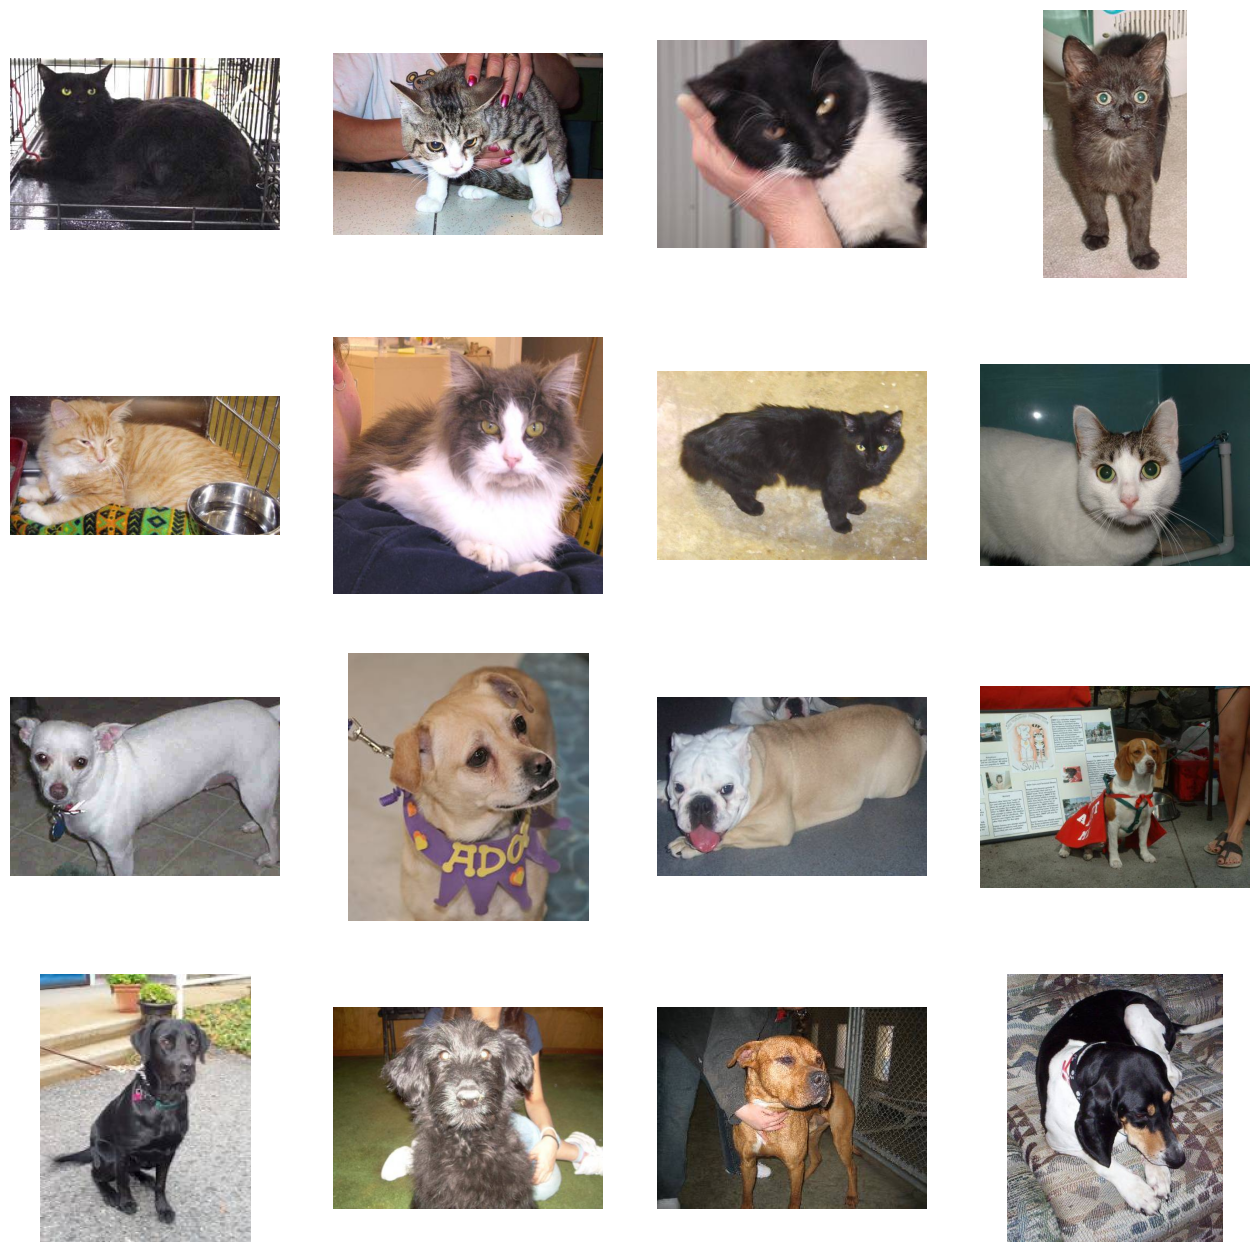

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

/Users/sohelshaikh/Development/ai/exploring_ai/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer = RMSprop(learning_rate=0.001),
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    './data/cats_and_dogs/train/',
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(
    './data/cats_and_dogs/validation/',
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)

Epoch 1/15


/Users/sohelshaikh/Development/ai/exploring_ai/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 11s - 108ms/step - accuracy: 0.5330 - loss: 0.7175 - val_accuracy: 0.6700 - val_loss: 0.6756
Epoch 2/15
100/100 - 10s - 103ms/step - accuracy: 0.6145 - loss: 0.6589 - val_accuracy: 0.6200 - val_loss: 0.6377
Epoch 3/15
100/100 - 11s - 105ms/step - accuracy: 0.6905 - loss: 0.5865 - val_accuracy: 0.6890 - val_loss: 0.5725
Epoch 4/15
100/100 - 10s - 101ms/step - accuracy: 0.7390 - loss: 0.5358 - val_accuracy: 0.6900 - val_loss: 0.5904
Epoch 5/15
100/100 - 10s - 103ms/step - accuracy: 0.7685 - loss: 0.4865 - val_accuracy: 0.7470 - val_loss: 0.5406
Epoch 6/15
100/100 - 10s - 103ms/step - accuracy: 0.8200 - loss: 0.4083 - val_accuracy: 0.6270 - val_loss: 0.7958
Epoch 7/15
100/100 - 11s - 105ms/step - accuracy: 0.8425 - loss: 0.3311 - val_accuracy: 0.7570 - val_loss: 0.5660
Epoch 8/15
100/100 - 11s - 106ms/step - accuracy: 0.8800 - loss: 0.2669 - val_accuracy: 0.7360 - val_loss: 0.6501
Epoch 9/15
100/100 - 11s - 108ms/step - accuracy: 0.9400 - loss: 0.1603 - val_accuracy: 0.7250 - va

In [17]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# predicting images
path = './data/content/dog.jpg'
img = load_img(path, target_size=(150,150))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

if classes[0] > 0.5:
    print("DOG")
else:
    print("CAT")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.]
DOG


In [18]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dog_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

ValueError: The layer sequential has never been called and thus has no defined input.

Text(0.5, 1.0, 'Training and validation loss')

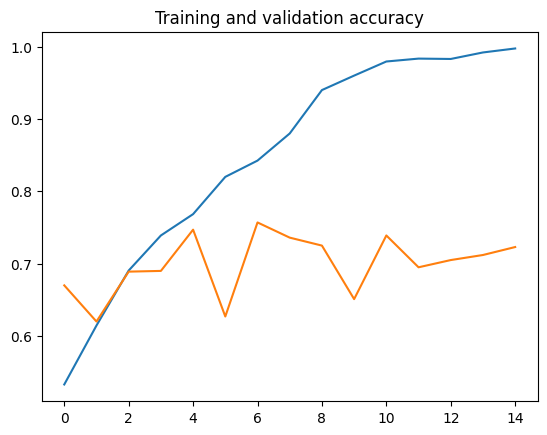

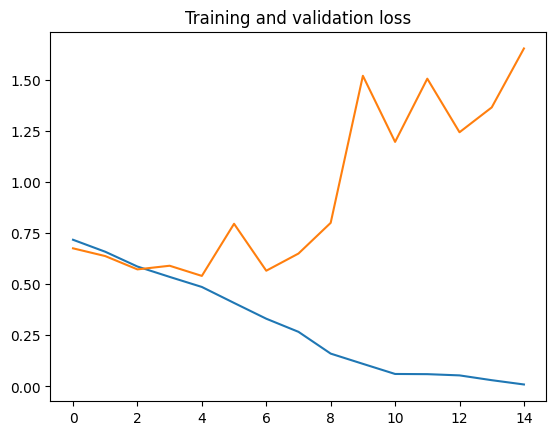

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )